Welcome to the Museum of Art interactive system!


Enter your email address:  hergbshs@ghcvehg.gdh
Enter your age:  55
Enter category (traditional/modern/contemporary):  contemporary


Available pictures in this category:
1. Ariya
2. Common-Goal
3. The-Hybrid-ideas
4. The-way-home
5. Unveiling-the-masquerade


Choose a picture number:  4
Apply Rotation? (yes/no):  yes
Enter rotation angle:  66
Apply Shearing? (yes/no):  no


Choose a blurring technique:
- gaussian: Gaussian Blur
- median: Median Blur
- bilateral: Bilateral Blur


Enter blurring technique (gaussian/median/bilateral):  bilateral



Access granted.
Email: hergbshs@ghcvehg.gdh
Age: 55
Chosen category: contemporary
Selected picture: The-way-home
Applying Transformations: rotation
Applying Blur: Bilateral Blur



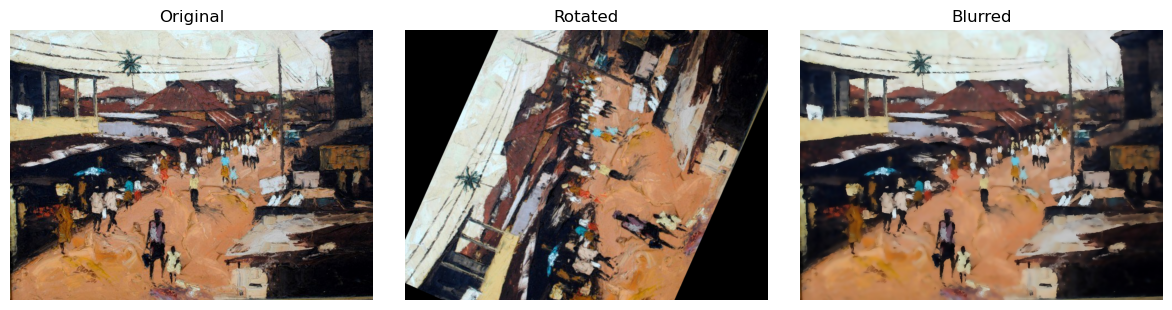

Images saved successfully.
Thank you for using the Museum of Art viewer!


In [13]:
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

def is_valid_email(email: str) -> bool:
    pattern = r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$'
    return re.match(pattern, email) is not None

def get_user_input():
    email = input("Enter your email address: ").strip()
    while not is_valid_email(email):
        print("Invalid email. Please try again.")
        email = input("Enter your email address: ").strip()
    
    age = -1
    while age < 18:
        try:
            age = int(input("Enter your age: ").strip())
            if age < 18:
                print("You must be at least 18 years old.")
        except ValueError:
            print("Invalid input. Enter a valid age.")
            age = -1
    
    valid_categories = {
        "traditional": ["Benin", "Gelede-Headdress", "Ife-Royal-head-Bronze", "Male-Nok-Head", "Traditional-bell"],
        "modern": ["Honorable-man", "Iwin", "Masks", "The-Dancer", "The-dye-pit"],
        "contemporary": ["Ariya", "Common-Goal", "The-Hybrid-ideas", "The-way-home", "Unveiling-the-masquerade"]
    }
    
    category = input("Enter category (traditional/modern/contemporary): ").strip().lower()
    while category not in valid_categories:
        print("Invalid category. Choose from: traditional, modern, contemporary.")
        category = input("Enter category: ").strip().lower()
    
    print("Available pictures in this category:")
    for idx, pic in enumerate(valid_categories[category], start=1):
        print(f"{idx}. {pic}")
    
    pic_choice = int(input("Choose a picture number: ").strip()) - 1
    while pic_choice not in range(len(valid_categories[category])):
        print("Invalid choice. Choose a valid picture number.")
        pic_choice = int(input("Choose a picture number: ").strip()) - 1
    
    return email, age, category, valid_categories[category][pic_choice]

def get_user_transformation_choice():
    transformations = {}
    if input("Apply Rotation? (yes/no): ").strip().lower() == "yes":
        angle = float(input("Enter rotation angle: ").strip())
        transformations["rotation"] = angle
    
    if input("Apply Shearing? (yes/no): ").strip().lower() == "yes":
        shear_x = float(input("Enter shear factor along X-axis: ").strip())
        shear_y = float(input("Enter shear factor along Y-axis: ").strip())
        transformations["shearing"] = (shear_x, shear_y)
    
    return transformations

def get_user_blur_choice():
    blur_types = {"gaussian": "Gaussian Blur", "median": "Median Blur", "bilateral": "Bilateral Blur"}
    print("Choose a blurring technique:")
    for key, value in blur_types.items():
        print(f"- {key}: {value}")
    blur_choice = input("Enter blurring technique (gaussian/median/bilateral): ").strip().lower()
    while blur_choice not in blur_types:
        print("Invalid choice. Choose from: gaussian, median, bilateral.")
        blur_choice = input("Enter blurring technique: ").strip().lower()
    return blur_choice

def load_category_image(category: str, picture: str):
    base_path = r"C:\\Users\\maxos\\CSC418\\dmoru883-dmoruCSC418\\Week 3\\Class project\\"
    image_path = f"{base_path}{category.capitalize()}-arts\\{picture}.jpg"
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Could not load image '{picture}' in '{category}' category.")
    return img

def apply_transformations(img, transformations):
    rows, cols = img.shape[:2]
    transformed_images = {"original": img}
    
    if "rotation" in transformations:
        M = cv2.getRotationMatrix2D((cols/2, rows/2), transformations["rotation"], 1)
        transformed_images["rotated"] = cv2.warpAffine(img, M, (cols, rows))
    
    if "shearing" in transformations:
        shear_x, shear_y = transformations["shearing"]
        M = np.float32([[1, shear_x, 0], [shear_y, 1, 0]])
        transformed_images["sheared"] = cv2.warpAffine(img, M, (cols, rows))
    
    return transformed_images

def apply_blurring(img, blur_choice):
    if blur_choice == "gaussian":
        return cv2.GaussianBlur(img, (5, 5), 0)
    elif blur_choice == "median":
        return cv2.medianBlur(img, 5)
    elif blur_choice == "bilateral":
        return cv2.bilateralFilter(img, 9, 75, 75)

def display_transformations(transformations):
    plt.figure(figsize=(12, 6))
    keys = list(transformations.keys())
    for i, key in enumerate(keys):
        plt.subplot(2, 3, i+1)
        plt.title(key.replace("_", " ").capitalize())
        img_rgb = cv2.cvtColor(transformations[key], cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    print("Welcome to the Museum of Art interactive system!")
    email, age, category, picture = get_user_input()
    transformations = get_user_transformation_choice()
    blur_choice = get_user_blur_choice()
    
    print(f"\nAccess granted.\nEmail: {email}\nAge: {age}\nChosen category: {category}\nSelected picture: {picture}\nApplying Transformations: {', '.join(transformations.keys())}\nApplying Blur: {blur_choice.capitalize()} Blur\n")
    
    try:
        image = load_category_image(category, picture)
    except FileNotFoundError as e:
        print(e)
        return
    
    transformed_images = apply_transformations(image, transformations)
    transformed_images["blurred"] = apply_blurring(image, blur_choice)
    display_transformations(transformed_images)
    
    for key, img in transformed_images.items():
        cv2.imwrite(f"output_{picture}_{key}.jpg", img)
    print("Images saved.")
    
   

if __name__ == "__main__":
    main()